# Chapter 6. Data Visualization Using Python

파이썬에서 데이터를 시각화하는 방법에 대해서 알아보자. 

- 시각화를 위해서는 시각화 관련 모듈을 로딩해야 한다. 
- 사용할 모듈은 Seaborn 이라는 모듈 (https://seaborn.pydata.org) 이다. 

Seaborn 에서 수행 가능한 다양한 종류의 시각화의 예는 이 링크를 참조하자 
https://seaborn.pydata.org/examples/index.html


## 실험 데이터를 이용한 Boxplot 작성법 

In [1]:
#seaborn 모듈을 sns 라는 약자로 불러온다.
#pandas를 pd라는 약자로 불러온다. 

import seaborn as sns
import pandas as pd

#예제 (Github에 있음) 엑셀 파일을 pandas로 읽어보자. 
kd=pd.read_excel('knockdown.xlsx')

위의 데이터는 Control과 어떤 유전자를 RNAi 로 knockdown 시킨 것, 그리고 이것을 Rescue 한 3가지 처리의 샘플을  
두가지 발생 단계(MI, MII)에서 단백질의 발현을 형광현미경으로 측정한 것을 정량한 결과이다.  

각각의 컬럼은 다른 샘플에서의 반복을 의미한다. 

아래 논문의 Fig.3과 같은 플롯 (Boxplot)을 어떻게 그릴 수 있을까?  
https://jcs.biologists.org/content/joces/128/1/160.full.pdf

각각의 반복은 동일하지 않은 관계로 DataFrame에 불러오면 공백은 NaN 이라고 표시된다.   
이를 시각화하기 위해서는 일단 포맷을 바꿀 필요가 있다. 

In [2]:
#불필요한 행을 줄인다. 
kd = kd.drop(columns='Unnamed: 0')
kd

,MI-Control,MI-RNAi,MI-Rescue,MII-Control,MII-RNAi,MII-Rescue
0,115.903573,38.415544,72.130314,83.363723,47.993328,72.287388
1,126.236345,65.777312,52.558250,90.655391,54.178471,64.361410
2,131.576317,38.465706,122.824657,87.380576,55.975686,55.227195
3,117.721156,37.074075,117.793223,79.322413,50.968077,62.595770
4,119.965972,63.443569,76.173226,102.184970,51.540825,56.121697
5,150.045320,40.850961,77.420474,77.859555,54.090038,122.730129
6,126.878243,35.028804,99.141456,75.913773,39.869128,128.268704
7,87.152298,35.907767,80.557172,65.535237,43.300153,66.228501
8,90.176818,34.086915,122.165746,55.749044,40.814665,127.066796
9,115.977250,27.842532,129.666567,55.855886,47.730282,51.503258


In [4]:
#포맷을 바꾸고 
transformed = pd.melt(kd,value_name='intensity',var_name='treatment').dropna()
#내용이 없는 행을 없앤다. 
transformed.dropna()

,treatment,intensity
0,MI-Control,115.903573
1,MI-Control,126.236345
2,MI-Control,131.576317
3,MI-Control,117.721156
4,MI-Control,119.965972
...,...,...
182,MII-Rescue,83.009689
183,MII-Rescue,57.735090
184,MII-Rescue,70.715919
185,MII-Rescue,87.750427


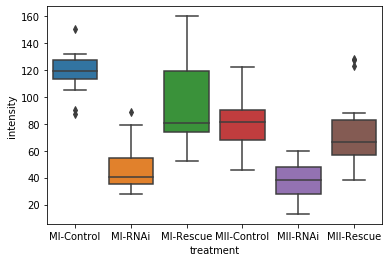

In [49]:
#Box plot 을 그려보자. 

sns.boxplot(data=transformed,y='intensity',x='treatment')

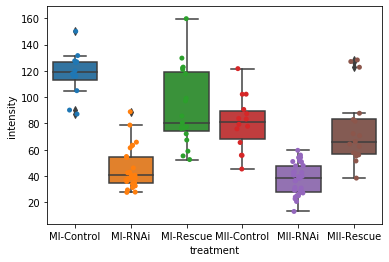

In [50]:
#box plot 위에 실제 데이터를 뿌려주면 데이터의 분포를 확인하기 쉽다. 

sns.boxplot(data=transformed,y='intensity',x='treatment')
sns.stripplot(data=transformed,y='intensity',x='treatment')

### 데이터 변형

각각의 샘플을 다른 컬러로 지정했지만, 그것보다는 Control, RNAi, Rescue 샘플을 각각 같은 색으로 칠해보자.  
이를 위해서는 데이터를 수정할 필요가 있다. 

'Treatment' 는 Sample Stage-Treatment 형식으로 되어 있는데 (MI-Control)  
이것을 각각의 컬럼으로 나누어 보자.  

split 함수를 이용하여 '-' 기준으로 나눈다. 

In [5]:
transformed

,treatment,intensity
0,MI-Control,115.903573
1,MI-Control,126.236345
2,MI-Control,131.576317
3,MI-Control,117.721156
4,MI-Control,119.965972
...,...,...
182,MII-Rescue,83.009689
183,MII-Rescue,57.735090
184,MII-Rescue,70.715919
185,MII-Rescue,87.750427


In [51]:
 transformed['treatment'].str.split('-')

0      [MI, Control]
1      [MI, Control]
2      [MI, Control]
3      [MI, Control]
4      [MI, Control]
           ...      
199    [MII, Rescue]
200    [MII, Rescue]
201    [MII, Rescue]
202    [MII, Rescue]
203    [MII, Rescue]
Name: treatment, Length: 204, dtype: object

In [53]:
#앞 부분은 'stage'에 저장하고
transformed['stage']=transformed['treatment'].str.split('-').str[0]
transformed['stage']

0       MI
1       MI
2       MI
3       MI
4       MI
      ... 
199    MII
200    MII
201    MII
202    MII
203    MII
Name: stage, Length: 204, dtype: object

In [55]:
#뒷 부분은 'Treat'에 저장
transformed['treat']=transformed['treatment'].str.split('-').str[1]
transformed['treat']

0      Control
1      Control
2      Control
3      Control
4      Control
        ...   
199     Rescue
200     Rescue
201     Rescue
202     Rescue
203     Rescue
Name: treat, Length: 204, dtype: object

In [56]:
#변형된 테이블을 살펴보자. 

transformed

,treatment,intensity,stage,treat
0,MI-Control,115.903573,MI,Control
1,MI-Control,126.236345,MI,Control
2,MI-Control,131.576317,MI,Control
3,MI-Control,117.721156,MI,Control
4,MI-Control,119.965972,MI,Control
...,...,...,...,...
199,MII-Rescue,NaN,MII,Rescue
200,MII-Rescue,NaN,MII,Rescue
201,MII-Rescue,NaN,MII,Rescue
202,MII-Rescue,NaN,MII,Rescue


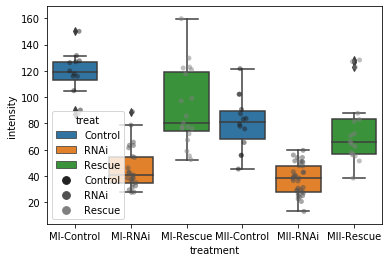

In [57]:
#'treat'의 종류에 따라서 다른 색을 칠하자

sns.boxplot(data=transformed,y='intensity',x='treatment',hue='treat',dodge=False)
sns.stripplot(data=transformed,y='intensity',x='treatment',hue='treat',jitter=True,dodge=False, alpha=0.5,color='grey')

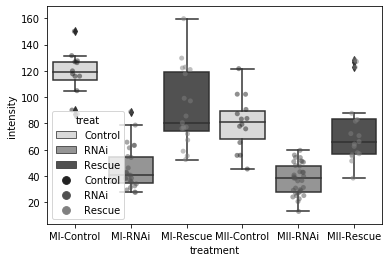

In [67]:
#색을 바꿀 수 있다. 
#색을 바꾸는 방법에 대해서는 여기 참조 https://seaborn.pydata.org/tutorial/color_palettes.html
#회색으로 바꾸자. 

sns.boxplot(data=transformed,y='intensity',x='treatment',hue='treat',dodge=False, palette="Greys")
sns.stripplot(data=transformed,y='intensity',x='treatment',hue='treat',jitter=True,dodge=False, alpha=0.5,color='grey')

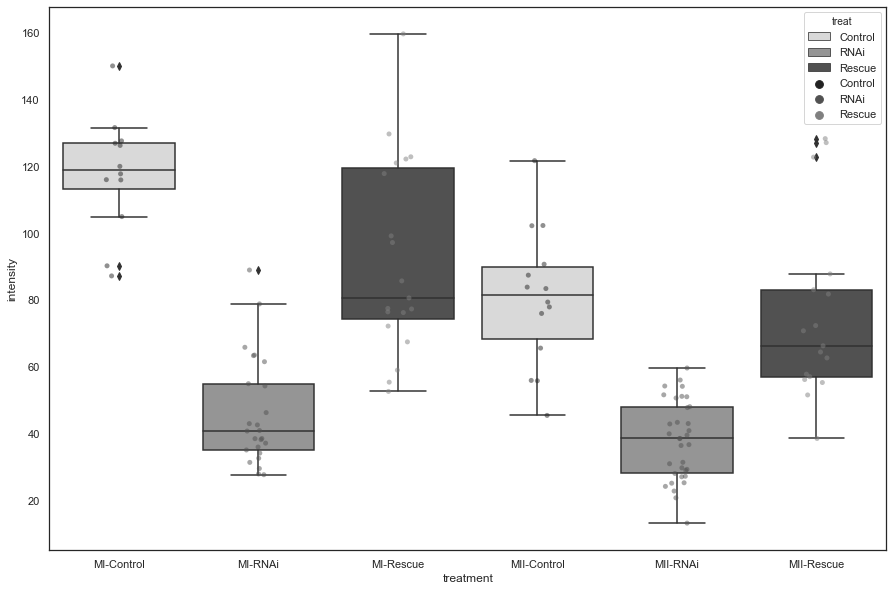

In [76]:
#그림의 크기를 키우자 
from matplotlib import pyplot as plt
#x와 y의 인치로 지정
plt.figure(figsize=(15,10))
sns.set_style("white")
sns.boxplot(data=transformed,y='intensity',x='treatment',hue='treat',dodge=False, palette="Greys")
sns.stripplot(data=transformed,y='intensity',x='treatment',hue='treat',jitter=True,dodge=False, alpha=0.5,color='grey')


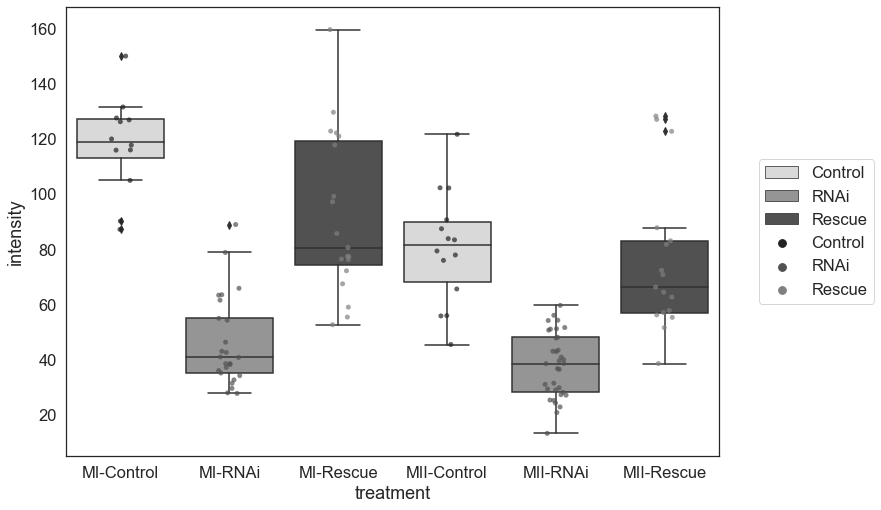

In [86]:
#글자 크기를 키우고 Legends를 왼쪽으로 배치 

sns.set(font_scale=1.5)
sns.set_style("white")
g = sns.boxplot(data=transformed,y='intensity',x='treatment',hue='treat',dodge=False, palette="Greys")
sns.stripplot(data=transformed,y='intensity',x='treatment',hue='treat',jitter=True,dodge=False, alpha=0.7,color='grey')
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
#그림을 fig.pdf로 저장
plt.savefig('fig.pdf')

이렇게 pdf 형태로 저장된 표는 그대로 사용할 수도 있고,  
Illustrator 등의 외부 프로그램을 이용하여 서식을 재조정할 수도 있음. 

## 코로나-19 감염자 데이터를 이용한 시계열 (Time-Series) 데이터 분석  


https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
에 있는 코로나-19 전세계 감염자 데이터를 이용한 비주얼라이제이션을 하자. 

In [89]:
#다른 종류의 그래프를 그려보자. 
#이를 위해 다른 종류의 데이터를 불러온다.
#국가별 코로나-19 감염자의 데이터이다. 

https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv

In [8]:
!ls *.csv

CCLE_expression.csv
sample_info.csv
time_series_covid19_confirmed_global.csv


In [9]:
#데이터를 불러오자. 
covid19 = pd.read_csv('time_series_covid19_confirmed_global.csv')
covid19

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,665,714,784,840,906,933,996,1026,1092,1176
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,646,659,673,673,696,704,713,717,717,723
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,19,19,24,24,24,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [10]:
#여기서 한국 데이터만 추린다. 

korea = covid19[covid19['Country/Region'].str.contains('korea',case=False)]

In [11]:
korea

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
143,NaN,"Korea, South",36.0,128.0,1,1,2,2,3,4,...,10537,10564,10591,10613,10635,10653,10661,10674,10683,10694


In [12]:
#시각화를 위해서 데이터의 형식을 바꾼다. 
#일단 열로 길게 된 데이터의 방향을 바꾼다. 

koreadata = pd.melt(korea,value_name='cases',var_name='date')
koreadata

,date,cases
0,Province/State,NaN
1,Country/Region,"Korea, South"
2,Lat,36
3,Long,128
4,1/22/20,1
...,...,...
91,4/18/20,10653
92,4/19/20,10661
93,4/20/20,10674
94,4/21/20,10683


In [13]:
#불필요한 처음 4행(0,1,2,3)을 지운다.

koreadata = koreadata[4:]

In [14]:
#데이터의 타입을 검사한다. 
#역시 데이터의 타입이 그냥 글자로 되어 있다...
koreadata.dtypes

date     object
cases    object
dtype: object

In [15]:
#건수 ('case')는 정수(int64)로 변환하고 
#날짜는 날짜 형식으로 변환한다. 

koreadata['cases']=koreadata['cases'].astype('int64')
koreadata['date']=pd.to_datetime(koreadata['date'])

/Users/suknamgoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/suknamgoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
koreadata.dtypes

date     datetime64[ns]
cases             int64
dtype: object

/Users/suknamgoong/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


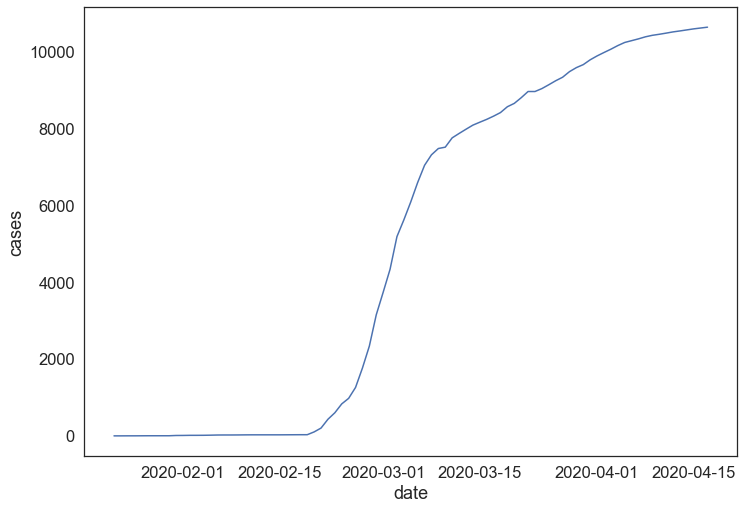

In [120]:
sns.lineplot(data=koreadata,x='date',y='cases')

일별 증가량을 계산해 보자.  
일별 증가량은 '오늘의 확진자 건수' - '어제의 확진자 건수'

In [19]:
#diff는 이전과의 증가량을 계산하는 함수이다.
difference = koreadata.diff()

#첫번째 날은 데이터가 없으므로 0 으로 채워 준다. 
difference = difference.fillna(0)
difference

/Users/suknamgoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  """


,date,cases
4,0 days,0.0
5,1 days,0.0
6,1 days,1.0
7,1 days,0.0
8,1 days,1.0
...,...,...
91,1 days,18.0
92,1 days,8.0
93,1 days,13.0
94,1 days,9.0


In [20]:
difference.columns=['interval','increase']

In [21]:
#한국 데이터에 증가건수를 덧붙인다. 
#기준은 index 이다. 

newkoreadata = pd.merge(koreadata,difference,left_index=True,right_index=True)

In [22]:
newkoreadata

,date,cases,interval,increase
4,2020-01-22,1,0 days,0.0
5,2020-01-23,1,1 days,0.0
6,2020-01-24,2,1 days,1.0
7,2020-01-25,2,1 days,0.0
8,2020-01-26,3,1 days,1.0
...,...,...,...,...
91,2020-04-18,10653,1 days,18.0
92,2020-04-19,10661,1 days,8.0
93,2020-04-20,10674,1 days,13.0
94,2020-04-21,10683,1 days,9.0


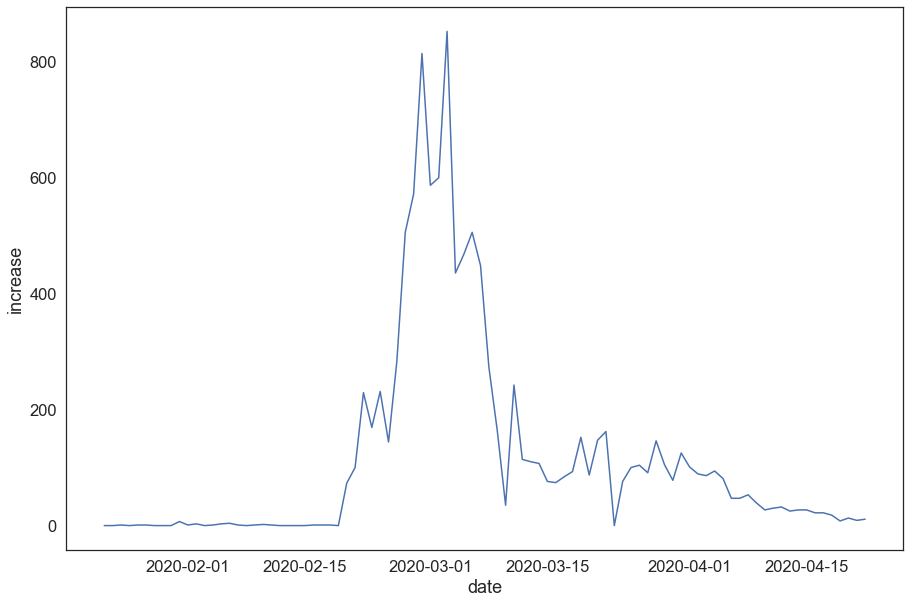

In [25]:
# 확진자 증가 추세를 플로팅해보자. 
from matplotlib import pyplot as plt
#x와 y의 인치로 지정
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style("white")
sns.lineplot(data=newkoreadata,x='date',y='increase')

In [140]:
#증가율과 전체 누적 증가율을 같이 표현하려면?
#이 데이터를 long form으로 바꾸어야 한다. 

newkoreadata


,date,cases,interval,increase
4,2020-01-22,1,0 days,0.0
5,2020-01-23,1,1 days,0.0
6,2020-01-24,2,1 days,1.0
7,2020-01-25,2,1 days,0.0
8,2020-01-26,3,1 days,1.0
...,...,...,...,...
86,2020-04-13,10537,1 days,25.0
87,2020-04-14,10564,1 days,27.0
88,2020-04-15,10591,1 days,27.0
89,2020-04-16,10613,1 days,22.0


In [27]:
newkorea = newkoreadata.melt(id_vars=['date'],value_vars=['cases','increase'])

In [28]:
newkorea

,date,variable,value
0,2020-01-22,cases,1.0
1,2020-01-23,cases,1.0
2,2020-01-24,cases,2.0
3,2020-01-25,cases,2.0
4,2020-01-26,cases,3.0
...,...,...,...
179,2020-04-18,increase,18.0
180,2020-04-19,increase,8.0
181,2020-04-20,increase,13.0
182,2020-04-21,increase,9.0


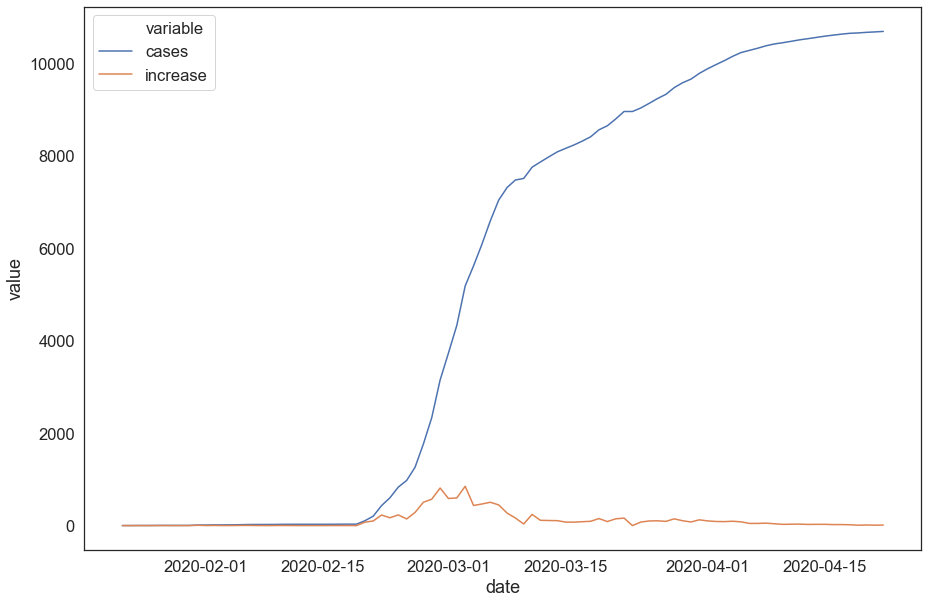

In [30]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style("white")
sns.lineplot(data=newkorea,x='date',y='value',hue='variable')

In [35]:
#일본의 데이터를 한국과 비교해보자. 
#동일한 방식으로 일본 데이터를 추려내자. 

japan = covid19[covid19['Country/Region'].str.contains('japan',case=False)]
japandata = pd.melt(japan,value_name='cases',var_name='date')
japandata = japandata[4:]
japandata['cases']=japandata['cases'].astype('int64')
japandata['date']=pd.to_datetime(japandata['date'])
difference = japandata.diff()
difference = difference.fillna(0)
difference.columns=['interval','increase']
newjapandata = pd.merge(japandata,difference,left_index=True,right_index=True)
newjapan = newjapandata.melt(id_vars=['date'],value_vars=['cases','increase'])

/Users/suknamgoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  # Remove the CWD from sys.path while we load stuff.


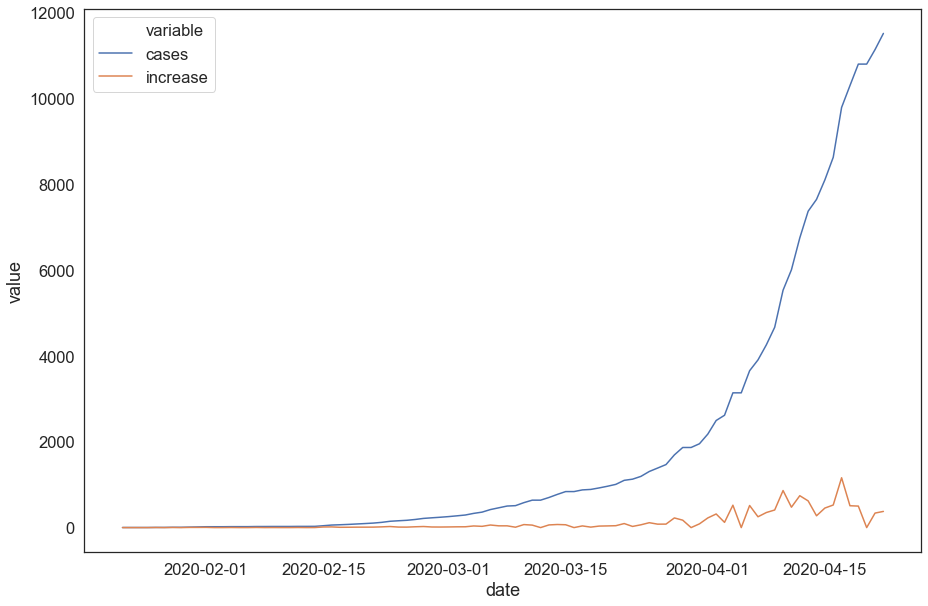

In [36]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style("white")
sns.lineplot(data=newjapan,x='date',y='value',hue='variable')

In [37]:
#한국과 일본의 발생 추이를 같은 컬럼에서 비교하자. 

In [38]:
newkorea

,date,variable,value
0,2020-01-22,cases,1.0
1,2020-01-23,cases,1.0
2,2020-01-24,cases,2.0
3,2020-01-25,cases,2.0
4,2020-01-26,cases,3.0
...,...,...,...
179,2020-04-18,increase,18.0
180,2020-04-19,increase,8.0
181,2020-04-20,increase,13.0
182,2020-04-21,increase,9.0


In [39]:
#여기서 발생수 (cases)만을 취하고, 이를 구분할 수 있도록 국가 코드를 붙이자. 
ko = newkorea[newkorea['variable']=='cases']

In [40]:
ko['country']='korea'
ko

/Users/suknamgoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,variable,value,country
0,2020-01-22,cases,1.0,korea
1,2020-01-23,cases,1.0,korea
2,2020-01-24,cases,2.0,korea
3,2020-01-25,cases,2.0,korea
4,2020-01-26,cases,3.0,korea
...,...,...,...,...
87,2020-04-18,cases,10653.0,korea
88,2020-04-19,cases,10661.0,korea
89,2020-04-20,cases,10674.0,korea
90,2020-04-21,cases,10683.0,korea


In [41]:
jp = newjapan[newjapan['variable']=='cases']
jp['country']='japan'
jp

/Users/suknamgoong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,variable,value,country
0,2020-01-22,cases,2.0,japan
1,2020-01-23,cases,2.0,japan
2,2020-01-24,cases,2.0,japan
3,2020-01-25,cases,2.0,japan
4,2020-01-26,cases,4.0,japan
...,...,...,...,...
87,2020-04-18,cases,10296.0,japan
88,2020-04-19,cases,10797.0,japan
89,2020-04-20,cases,10797.0,japan
90,2020-04-21,cases,11135.0,japan


In [42]:
#한일 데이터를 합치자 
kojp = pd.concat([ko,jp])
kojp

,date,variable,value,country
0,2020-01-22,cases,1.0,korea
1,2020-01-23,cases,1.0,korea
2,2020-01-24,cases,2.0,korea
3,2020-01-25,cases,2.0,korea
4,2020-01-26,cases,3.0,korea
...,...,...,...,...
87,2020-04-18,cases,10296.0,japan
88,2020-04-19,cases,10797.0,japan
89,2020-04-20,cases,10797.0,japan
90,2020-04-21,cases,11135.0,japan


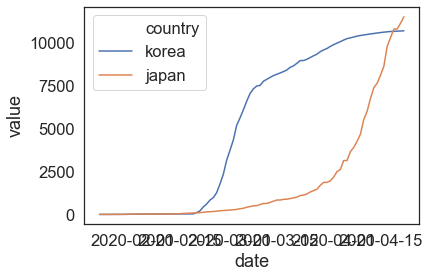

In [43]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style("white")
sns.lineplot(data=kojp,x='date',y='value',hue='country')

## 연습문제

이 데이터셋에서 미국, 이탈리아, 독일, 프랑스의 전체 발생 추이를 추출하여 하나의 그래프로 그려 보자. 

## RNA-Seq 데이터 시각화 

오믹스 데이터셋과 같은 데이터도 분석하여 시각화할 수 있다. 
https://www.ebi.ac.uk/gxa/home  

여기서 다음 예제 데이터를 다운로드받아보자.   
https://www.ebi.ac.uk/gxa/experiments/E-MTAB-8021/Downloads   


여기는 Mechanical Stimulation 을 가한 Arabidopsis에서 발현되는 유전자들을 RNA-Seq으로 분석하였음.  
https://www.ebi.ac.uk/gxa/experiments-content/E-MTAB-8021/resources/DifferentialSecondaryDataFiles.RnaSeq/analytics

In [3]:
#데이터를 다운로드하자. 
#RNA-Seq 데이터 대신 일단 분석이 끝난 데이터를 다운로드한다. 

!curl -O https://www.ebi.ac.uk/gxa/experiments-content/E-MTAB-8021/resources/DifferentialSecondaryDataFiles.RnaSeq/analytics

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3024k    0 3024k    0     0  62204      0 --:--:--  0:00:49 --:--:--  128k5463      0 --:--:--  0:00:10 --:--:-- 33836 43567      0 --:--:--  0:00:28 --:--:--  9985    0  53991      0 --:--:--  0:00:44 --:--:--  107k   0  59672      0 --:--:--  0:00:47 --:--:--  115k


In [5]:
!head analytics

Gene ID	Gene Name	'mechanical stimulation' at '10 minute' vs 'none'.p-value	'mechanical stimulation' at '10 minute' vs 'none'.log2foldchange	'mechanical stimulation' at '180 minute' vs 'none'.p-value	'mechanical stimulation' at '180 minute' vs 'none'.log2foldchange	'mechanical stimulation' at '25 minute' vs 'none'.p-value	'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange	'mechanical stimulation' at '40 minute' vs 'none'.p-value	'mechanical stimulation' at '40 minute' vs 'none'.log2foldchange	'mechanical stimulation' at '60 minute' vs 'none'.p-value	'mechanical stimulation' at '60 minute' vs 'none'.log2foldchange
AT1G01010	NAC001	0.913926896004506	0.1	0.450113670995035	-0.2	0.903152706502036	-0.1	0.881749363946757	-0.1	0.976020924632684	0
AT1G01020	ARV1	0.998052849979793	0	0.998911386427653	0	0.843019851735852	-0.1	0.923976970947941	0	0.706499041557469	-0.1
AT1G01030	NGA3	0.23409293561477	-0.4	0.169026146462494	-0.4	0.94628061374395	0	0.215783549696733	-0.4	0.077167070894

In [46]:
import pandas as pd 

analysis = pd.read_csv('analytics',sep='\t')

In [47]:
#mechanical stimulation 을 준다음 
analysis = analysis.sort_values(by="'mechanical stimulation' at '10 minute' vs 'none'.log2foldchange",ascending=False)

In [48]:
#Fold change가 가장 높은 200개의 유전자의 데이터를 추출 

Top100 = analysis[0:200]

In [49]:
#데이터를 살펴본다. 
#데이터는 콘트롤과 자극을 준 후 10,25,40,60,180분후의 샘플의 RNA 발현을 비교한 후, 
# 각 유전자의 fold change (log2)와 p-value이다.


Top100

,Gene ID,Gene Name,'mechanical stimulation' at '10 minute' vs 'none'.p-value,'mechanical stimulation' at '10 minute' vs 'none'.log2foldchange,'mechanical stimulation' at '180 minute' vs 'none'.p-value,'mechanical stimulation' at '180 minute' vs 'none'.log2foldchange,'mechanical stimulation' at '25 minute' vs 'none'.p-value,'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange,'mechanical stimulation' at '40 minute' vs 'none'.p-value,'mechanical stimulation' at '40 minute' vs 'none'.log2foldchange,'mechanical stimulation' at '60 minute' vs 'none'.p-value,'mechanical stimulation' at '60 minute' vs 'none'.log2foldchange
7773,AT1G72910,NaN,4.068431e-98,4.5,0.004557,0.9,2.425499e-80,4.9,3.287258e-05,1.2,2.336083e-01,0.5
7774,AT1G72920,NaN,6.753352e-95,4.3,0.313913,0.4,4.471842e-62,4.3,1.344894e-01,0.6,4.381902e-01,0.4
4727,AT1G35210,NaN,1.632665e-70,4.3,0.364723,0.4,1.236792e-61,4.8,2.248447e-06,1.6,1.808506e-02,0.9
1241,AT1G07135,NaN,3.949482e-60,4.0,0.041216,0.7,2.685356e-69,5.0,9.466946e-20,2.7,3.173133e-04,1.3
30276,AT5G47230,ERF5,4.598911e-96,3.9,0.944724,0.0,5.739973e-64,3.6,9.226997e-01,0.0,8.222010e-01,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...
7066,AT1G66500,PCFS1,8.593342e-17,1.7,0.570901,-0.2,2.338280e-36,2.0,1.153085e-07,0.9,6.703631e-02,0.4
19791,AT3G59310,NaN,5.126284e-18,1.7,0.040334,0.4,3.362959e-48,2.5,1.552386e-45,2.4,1.323348e-19,1.5
16821,AT3G20600,NDR1,1.236595e-14,1.7,0.881265,0.1,1.018738e-33,2.6,3.466458e-09,1.5,4.647340e-02,0.6
27254,AT5G13190,NaN,1.616630e-17,1.7,0.896419,0.0,1.188148e-68,2.7,1.541638e-76,1.9,2.285483e-40,1.5


In [50]:
Top100.columns

Index(['Gene ID', 'Gene Name',
       ''mechanical stimulation' at '10 minute' vs 'none'.p-value',
       ''mechanical stimulation' at '10 minute' vs 'none'.log2foldchange',
       ''mechanical stimulation' at '180 minute' vs 'none'.p-value',
       ''mechanical stimulation' at '180 minute' vs 'none'.log2foldchange',
       ''mechanical stimulation' at '25 minute' vs 'none'.p-value',
       ''mechanical stimulation' at '25 minute' vs 'none'.log2foldchange',
       ''mechanical stimulation' at '40 minute' vs 'none'.p-value',
       ''mechanical stimulation' at '40 minute' vs 'none'.log2foldchange',
       ''mechanical stimulation' at '60 minute' vs 'none'.p-value',
       ''mechanical stimulation' at '60 minute' vs 'none'.log2foldchange'],
      dtype='object')

In [51]:
#
#Fold change 데이터만을 추린다. 
#

T100 = Top100[["Gene ID",
       "'mechanical stimulation' at '10 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '40 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '60 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '180 minute' vs 'none'.log2foldchange"]]

T100.columns=['Gene','10min','25min','40min','60min','180min']

In [52]:
T100.dtypes

Gene       object
10min     float64
25min     float64
40min     float64
60min     float64
180min    float64
dtype: object

In [54]:
T1 = T100.set_index('Gene')
T1

,10min,25min,40min,60min,180min
Gene,,,,,
AT1G72910,4.5,4.9,1.2,0.5,0.9
AT1G72920,4.3,4.3,0.6,0.4,0.4
AT1G35210,4.3,4.8,1.6,0.9,0.4
AT1G07135,4.0,5.0,2.7,1.3,0.7
AT5G47230,3.9,3.6,0.0,0.1,0.0
...,...,...,...,...,...
AT1G66500,1.7,2.0,0.9,0.4,-0.2
AT3G59310,1.7,2.5,2.4,1.5,0.4
AT3G20600,1.7,2.6,1.5,0.6,0.1


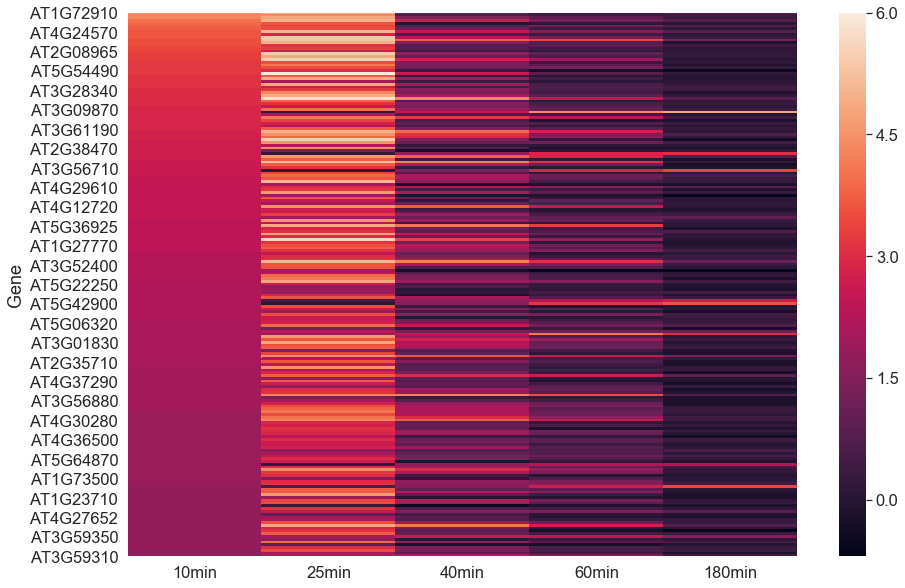

In [55]:
import seaborn as sns
from matplotlib import pyplot as plt
#x와 y의 인치로 지정
plt.figure(figsize=(15,10))
sns.set_style("white")
sns.heatmap(T1)

In [75]:
#데이터를 wide form에서 long form으로 바꾼다. 
#

T100

,Gene,10min,25min,40min,60min,180min
7773,AT1G72910,4.5,4.9,1.2,0.5,0.9
7774,AT1G72920,4.3,4.3,0.6,0.4,0.4
4727,AT1G35210,4.3,4.8,1.6,0.9,0.4
1241,AT1G07135,4.0,5.0,2.7,1.3,0.7
30276,AT5G47230,3.9,3.6,0.0,0.1,0.0
...,...,...,...,...,...,...
8179,AT1G76650,2.3,3.9,1.4,0.6,0.2
12002,AT2G32030,2.3,4.1,1.4,0.6,-0.2
23327,AT4G23810,2.2,4.8,2.0,1.6,0.5
28170,AT5G22250,2.2,2.7,0.4,0.3,0.0


In [79]:
#데이터를 long form으로 바꾸고, 시간을 숫자로 바꾼다. 

data = pd.melt(T100,id_vars=['Gene'])
data['variable']=data['variable'].str.replace('min','').astype('int')

In [80]:
data.dtypes

Gene         object
variable      int64
value       float64
dtype: object

In [81]:
data

,Gene,variable,value
0,AT1G72910,10,4.5
1,AT1G72920,10,4.3
2,AT1G35210,10,4.3
3,AT1G07135,10,4.0
4,AT5G47230,10,3.9
...,...,...,...
495,AT1G76650,180,0.2
496,AT2G32030,180,-0.2
497,AT4G23810,180,0.5
498,AT5G22250,180,0.0


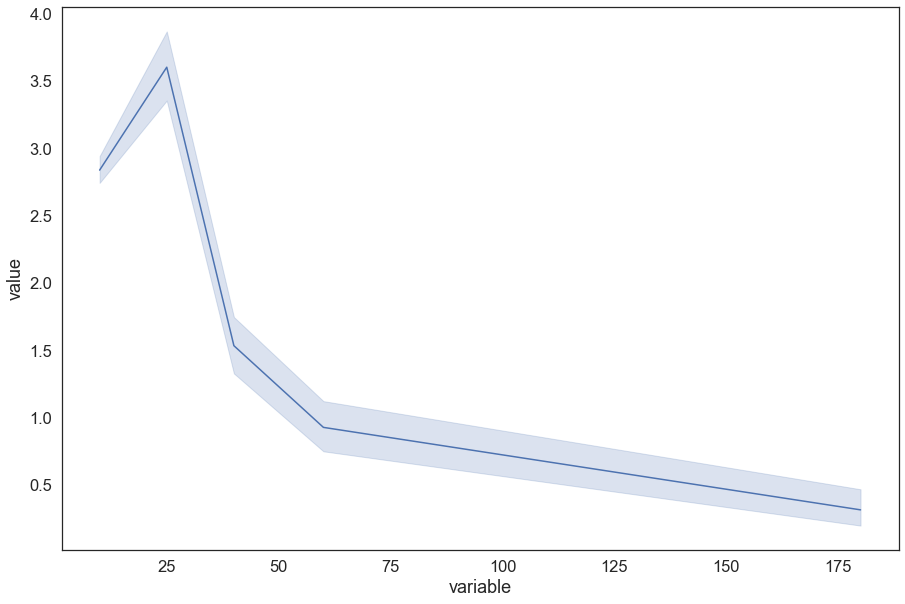

In [179]:
#선별된 100개 유전자의 평균과 추세를 표시한다. 

sns.set(font_scale=1.5)
sns.set_style("white")
plt.figure(figsize=(15,10))
sns.lineplot(data=data,x='variable',y='value')

In [136]:
#이번에는 25분 지나면 감소하는 유전자이 어떻게 변하는지를 살펴본다. 

analysis2 = analysis.sort_values(by="'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange",ascending=True)[0:100]
Top200 = analysis2[0:10]
T200 = Top200[["Gene ID",
       "'mechanical stimulation' at '10 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '40 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '60 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '180 minute' vs 'none'.log2foldchange"]]
T200.columns=['Gene','10min','25min','40min','60min','180min']
data2 = pd.melt(T200,id_vars=['Gene'])
data2['variable']=data2['variable'].str.replace('min','').astype('int')
T2 = T200.set_index('Gene')

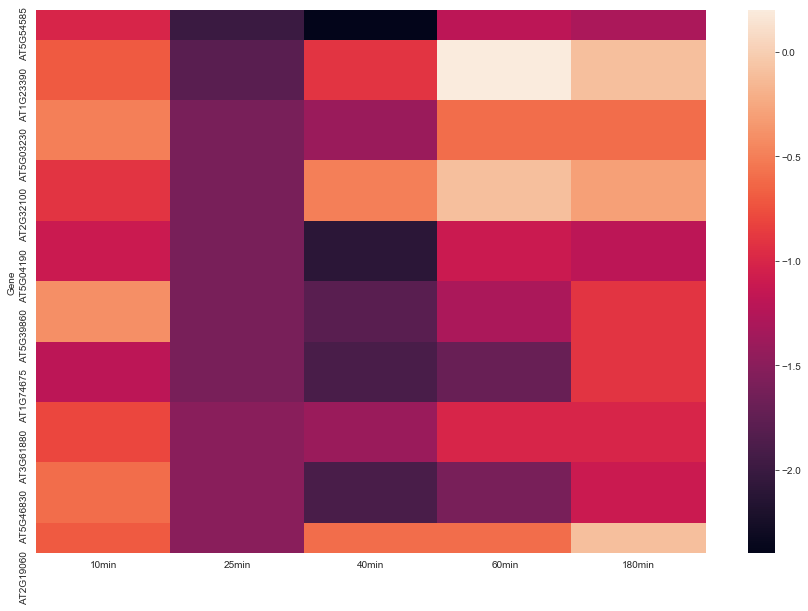

In [137]:
plt.figure(figsize=(15,10))
sns.set_style("white")
sns.heatmap(T2)

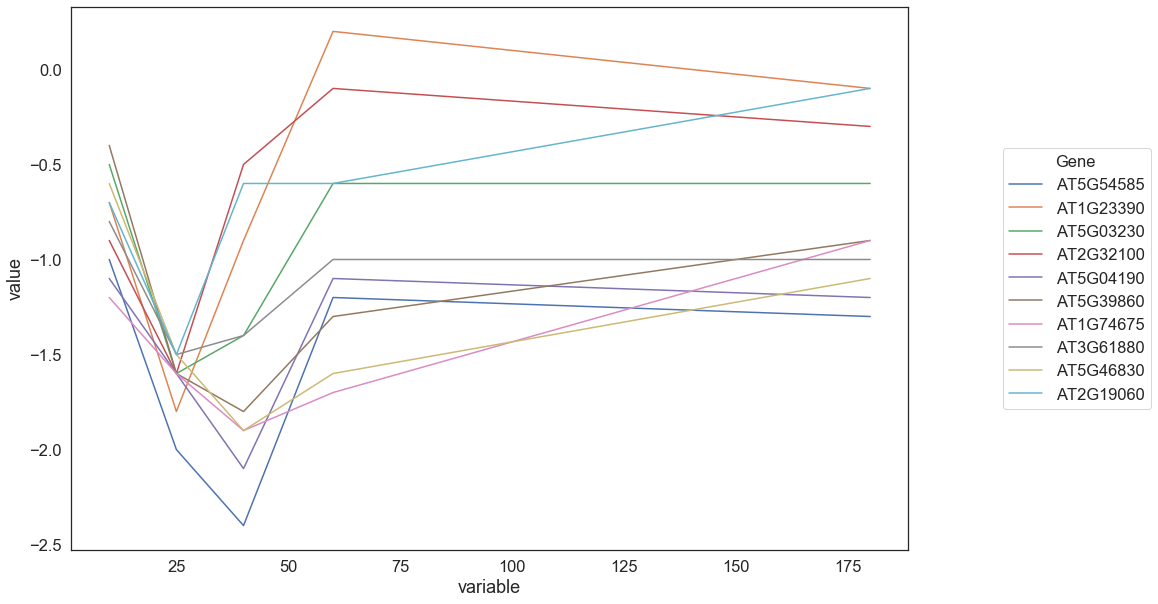

In [178]:
sns.set(font_scale=1.5)
sns.set_style("white")
plt.figure(figsize=(15,10))

g=sns.lineplot(data=data2,x='variable',y='value',hue='Gene')
g.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), ncol=1)

In [ ]:
### 유전자의 정보를 추가해 본다. 
# 5장에서 사용했던 DNA, Protein 시퀀스로부터 정보를 추출하여 데이터테이블로 넣은 코드를 다시 재활용하자. 

In [2]:
import pandas as pd
from pyfaidx import Fasta

def mid_extract (original, search1, search2):
    if (search1 in original) & (search2 in original):
        return(original.split(search1)[1].split(search2)[0])
    else:
        return('')

#5강에서 했던 단백질 서열에서부터 정보 추출 
    
AraProtein= Fasta('GCA_000001735.2_TAIR10.1_protein.faa')
proteinkey = []
proteindescription = []
proteinsequence = []

for protein in AraProtein.keys():
    proteinkey.append(protein)
    proteindescription.append(AraProtein[protein].long_name.split(protein+' ')[1].split(' [')[0])
    proteinsequence.append(str(AraProtein[protein]))


proteins = pd.DataFrame(data={'key':proteinkey,'description':proteindescription,'sequence':proteinsequence})
AraSequence= Fasta('GCA_000001735.2_TAIR10.1_cds_from_genomic.fna')


#5강에서 했던 DNA CDS 시퀀스 설명으로부터 정보 추출

 
DNAsequence = []
DNAproteinid = []
DNAlocusid = []

for Sequence in AraSequence.keys():
    name = AraSequence[Sequence].long_name
    DNAsequence.append(str(AraSequence[Sequence]))
    DNAproteinid.append(mid_extract(name,'[protein_id=',']'))
    DNAlocusid.append(mid_extract(name,'[locus_tag=',']'))

DNASeq = pd.DataFrame(data={'protein':DNAproteinid,'sequence':DNAsequence, 'locus':DNAlocusid})

#이 내용을 DNAprotein 이라는 데이터프레임으로 저장 
DNAprotein = pd.merge(DNASeq,proteins, left_on='protein',right_on='key', how='left')

In [3]:
DNAprotein[['locus','description']]

,locus,description
0,AT1G01010,NAC domain containing protein 1
1,AT1G01020,ARV1 family protein
2,AT1G01020,ARV1 family protein
3,AT1G01020,ARV1 family protein
4,AT1G01020,ARV1 family protein
...,...,...
48262,,NADH dehydrogenase ND2 (chloroplast)
48263,,orf77 (chloroplast)
48264,,ycf2 (chloroplast)
48265,,ribosomal protein L23 (chloroplast)


In [57]:
analysis2 = analysis.sort_values(by="'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange",ascending=False)[0:100]

anal = analysis2[["Gene ID",
       "'mechanical stimulation' at '10 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '25 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '40 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '60 minute' vs 'none'.log2foldchange",
       "'mechanical stimulation' at '180 minute' vs 'none'.log2foldchange"]]
anal.columns=['Gene','10min','25min','40min','60min','180min']

In [58]:
anal

,Gene,10min,25min,40min,60min,180min
7019,AT1G66090,3.2,6.0,2.6,0.9,0.2
29627,AT5G41750,3.0,5.8,4.3,2.5,0.8
7729,AT1G72520,2.4,5.6,3.4,1.9,0.0
17804,AT3G29000,2.8,5.5,1.5,0.2,-0.4
30058,AT5G45340,3.3,5.5,2.8,1.8,0.0
...,...,...,...,...,...,...
12377,AT2G35290,2.1,3.6,2.8,1.9,0.3
28667,AT5G26920,2.5,3.6,1.1,0.2,0.1
30166,AT5G46295,2.3,3.6,0.6,0.8,0.1
19035,AT3G52400,2.3,3.6,2.0,1.4,0.3


In [155]:
DP = DNAprotein[['locus','description']]

In [159]:
DPP=pd.merge(anal,DP,left_on='Gene',right_on='locus',how='inner').drop_duplicates()

In [163]:
DPPData=DPP[['description','10min','25min','40min','60min','180min']].set_index('description')

In [164]:
DPPData

,10min,25min,40min,60min,180min
description,,,,,
Disease resistance protein (TIR-NBS class),3.2,6.0,2.6,0.9,0.2
Disease resistance protein (TIR-NBS-LRR class) family,3.0,5.8,4.3,2.5,0.8
PLAT/LH2 domain-containing lipoxygenase family protein,2.4,5.6,3.4,1.9,0.0
Calcium-binding EF-hand family protein,2.8,5.5,1.5,0.2,-0.4
"cytochrome P450, family 707, subfamily A, polypeptide 3",3.3,5.5,2.8,1.8,0.0
...,...,...,...,...,...
hypothetical protein AT2G35290,2.1,3.6,2.8,1.9,0.3
Cam-binding protein 60-like G,2.5,3.6,1.1,0.2,0.1
transmembrane protein,2.3,3.6,0.6,0.8,0.1


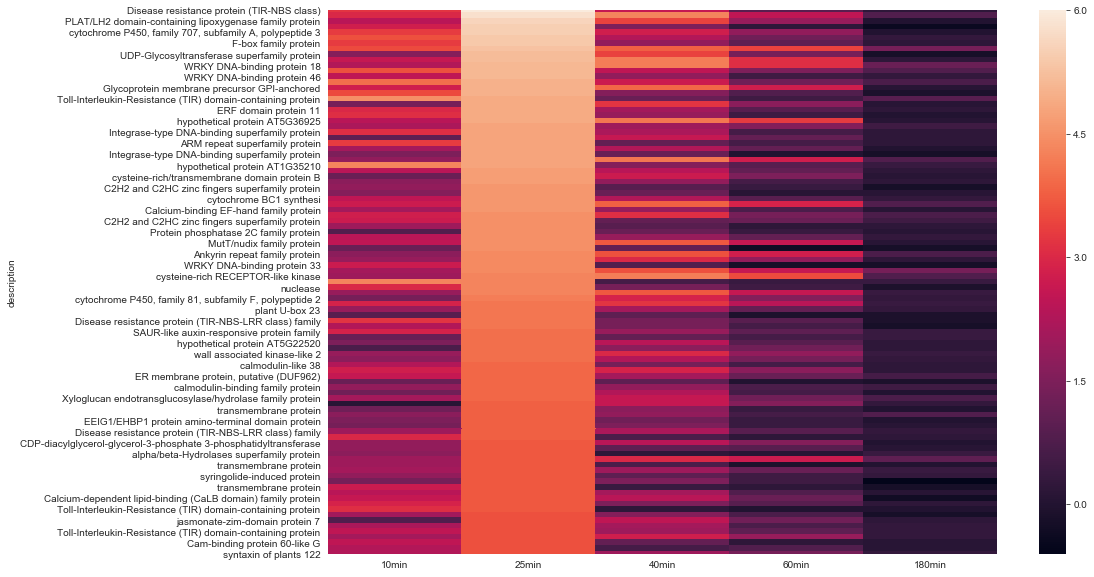

In [165]:
plt.figure(figsize=(15,10))
sns.set_style("white")
sns.heatmap(DPPData)

<Figure size 1080x2160 with 0 Axes>

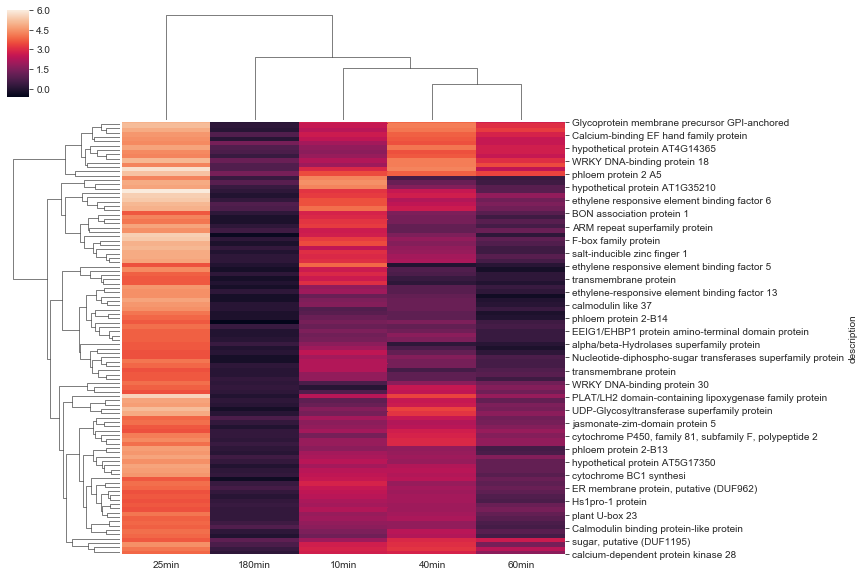

In [169]:
#
#비슷한 발현 변화 패턴을 보인 유전자 및 샘플별로 클러스터링 분석을 할 수 이싿. 
#

g = sns.clustermap(DPPData)

In [171]:
DPPData.to_excel('Excel_expression.xlsx')

## 프로테옴의 길이 비교 

단백질 데이터를 로딩하였으니 떡본 김에 제사지낸다고 (...) 전체 단백질 길이의 히스토그램을 그려 보자. 

In [5]:
DNAprotein

,protein,sequence_x,locus,key,description,sequence_y
0,AEE27216.1,ATGGAGGATCAAGTTGGGTTTGGGTTCCGTCCGAACGACGAGGAGC...,AT1G01010,AEE27216.1,NAC domain containing protein 1,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYD...
1,AEE27217.1,ATGGCGGCGAGTGAACACAGATGCGTGGGATGTGGTTTTAGGGTAA...,AT1G01020,AEE27217.1,ARV1 family protein,MAASEHRCVGCGFRVKSLFIQYSPGNIRLMKCGNCKEVADEYIECE...
2,ANM59418.1,ATGAGTACATCGAGTGTGAACGCATGGTCTGTTTTAATCACTTTCT...,AT1G01020,ANM59418.1,ARV1 family protein,MSTSSVNAWSVLITFFPFLGVSLFLSNFGFWFFNCFLWQIIFIDLI...
3,ANM59420.1,ATGAGTACATCGAGTGTGAACGCATGGTCTGTTTTAATCACTTTCT...,AT1G01020,ANM59420.1,ARV1 family protein,MSTSSVNAWSVLITFFPFLGVSLFLSNFGFWFFNCFLWQIIFIDLI...
4,ANM59419.1,ATGATTATTTTCATCGATTTAATCCTTCACAGACCAAAGGTATATA...,AT1G01020,ANM59419.1,ARV1 family protein,MIIFIDLILHRPKVYRHVLYNAINPATVNIQHLLWKLVFAYLLLDC...
...,...,...,...,...,...,...
48262,BAA84447.1,ATGGCTATAACAGAGTTTCTGTTATTCATATTAACAGCTACTCTAG...,,BAA84447.1,NADH dehydrogenase ND2 (chloroplast),MAITEFLLFILTATLGGMFLCGANDLITIFVAPECFSLCSYLLSGY...
48263,BAA84448.1,ATGCTACTACTGAAACATGGAAGAATTGAAATCTTAGATCAAAACA...,,BAA84448.1,orf77 (chloroplast),MLLLKHGRIEILDQNTMYGWYELPKQEFLNSEQPELLLTTSKKFPL...
48264,BAA84449.1,ATGAAAGGACATCAATTCAAATCCTGGATTTTCGAATTGAGAGAAA...,,BAA84449.1,ycf2 (chloroplast),MKGHQFKSWIFELREIVREIKNAHYFLDSWTQFNSVGSFIHIFFHQ...
48265,BAA84450.1,ATGGATGGAATCAAATATGCAGTATTTACAGACAAAAGTATTCGGT...,,BAA84450.1,ribosomal protein L23 (chloroplast),MDGIKYAVFTDKSIRLLGKNQYTFNVESGSTRTEIKHWVELFFGVK...


In [7]:
#이전에 사용한 단백질 분자량을 구하는 함수를 단백질 서열에 적용하여 분자량을 구하자. 

def MolWeight(proteinsequence):
# 분자량을 구하는 함수 
# proteinsequence 에 아미노산 서열을 받고 
# MW 에는 각각의 아미노산과 분자량의 딕셔너리가 있다. 
    MW = {'G':57.05,
          'A':71.09,
          'S':87.08,
          'T':101.11,
          'C':103.15,
          'V':99.14,
          'L':113.16,
          'I':113.16,
          'M':131.19,
          'P':97.12,
          'F':147.18,
          'Y':163.18,
          'W':186.21,
          'D':115.09,
          'E':129.12,
          'N':114.11,
          'Q':128.14,
          'H':137.14,
          'K':128.17,
          'R':156.19,
          'X':0,
          'J':0}
    MolecularWeight=0
    for aa in proteinsequence:
        MolecularWeight=MolecularWeight+MW[aa]
    return(MolecularWeight)

DNAprotein['MW']=DNAprotein['sequence_y'].apply(MolWeight)

In [8]:
DNAprotein

,protein,sequence_x,locus,key,description,sequence_y,MW
0,AEE27216.1,ATGGAGGATCAAGTTGGGTTTGGGTTCCGTCCGAACGACGAGGAGC...,AT1G01010,AEE27216.1,NAC domain containing protein 1,MEDQVGFGFRPNDEELVGHYLRNKIEGNTSRDVEVAISEVNICSYD...,49409.01
1,AEE27217.1,ATGGCGGCGAGTGAACACAGATGCGTGGGATGTGGTTTTAGGGTAA...,AT1G01020,AEE27217.1,ARV1 family protein,MAASEHRCVGCGFRVKSLFIQYSPGNIRLMKCGNCKEVADEYIECE...,28074.41
2,ANM59418.1,ATGAGTACATCGAGTGTGAACGCATGGTCTGTTTTAATCACTTTCT...,AT1G01020,ANM59418.1,ARV1 family protein,MSTSSVNAWSVLITFFPFLGVSLFLSNFGFWFFNCFLWQIIFIDLI...,27189.31
3,ANM59420.1,ATGAGTACATCGAGTGTGAACGCATGGTCTGTTTTAATCACTTTCT...,AT1G01020,ANM59420.1,ARV1 family protein,MSTSSVNAWSVLITFFPFLGVSLFLSNFGFWFFNCFLWQIIFIDLI...,27189.31
4,ANM59419.1,ATGATTATTTTCATCGATTTAATCCTTCACAGACCAAAGGTATATA...,AT1G01020,ANM59419.1,ARV1 family protein,MIIFIDLILHRPKVYRHVLYNAINPATVNIQHLLWKLVFAYLLLDC...,22749.05
...,...,...,...,...,...,...,...
48262,BAA84447.1,ATGGCTATAACAGAGTTTCTGTTATTCATATTAACAGCTACTCTAG...,,BAA84447.1,NADH dehydrogenase ND2 (chloroplast),MAITEFLLFILTATLGGMFLCGANDLITIFVAPECFSLCSYLLSGY...,42461.08
48263,BAA84448.1,ATGCTACTACTGAAACATGGAAGAATTGAAATCTTAGATCAAAACA...,,BAA84448.1,orf77 (chloroplast),MLLLKHGRIEILDQNTMYGWYELPKQEFLNSEQPELLLTTSKKFPL...,8995.74
48264,BAA84449.1,ATGAAAGGACATCAATTCAAATCCTGGATTTTCGAATTGAGAGAAA...,,BAA84449.1,ycf2 (chloroplast),MKGHQFKSWIFELREIVREIKNAHYFLDSWTQFNSVGSFIHIFFHQ...,269553.69
48265,BAA84450.1,ATGGATGGAATCAAATATGCAGTATTTACAGACAAAAGTATTCGGT...,,BAA84450.1,ribosomal protein L23 (chloroplast),MDGIKYAVFTDKSIRLLGKNQYTFNVESGSTRTEIKHWVELFFGVK...,10770.95


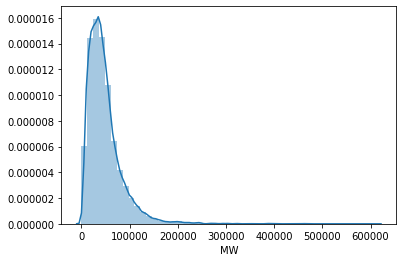

In [10]:
%matplotlib inline
import seaborn as sns

sns.distplot(DNAprotein['MW'])

다른 식물간의 단백질 분자량을 비교하면 어떨까? 

쌀의 데이터를 읽어보자. 

https://ftp.ncbi.nlm.nih.gov/genomes/genbank/plant/Oryza_sativa/latest_assembly_versions/GCA_000004655.2_ASM465v1/
    

In [11]:
!curl -O "https://ftp.ncbi.nlm.nih.gov/genomes/genbank/plant/Oryza_sativa/latest_assembly_versions/GCA_000004655.2_ASM465v1/GCA_000004655.2_ASM465v1_protein.faa.gz"
!curl -O "https://ftp.ncbi.nlm.nih.gov/genomes/genbank/plant/Oryza_sativa/latest_assembly_versions/GCA_000004655.2_ASM465v1/GCA_000004655.2_ASM465v1_cds_from_genomic.fna.gz"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8201k  100 8201k    0     0  1820k      0  0:00:04  0:00:04 --:--:-- 1820k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14.4M  100 14.4M    0     0  2448k      0  0:00:06  0:00:06 --:--:-- 3091k


In [12]:
!ls *.gz

Araport11_GFF3_genes_transposons.201606.gff.gz
GCA_000001735.2_TAIR10.1_cds_from_genomic.fna.gz
GCA_000001735.2_TAIR10.1_genomic.fna.gz
GCA_000001735.2_TAIR10.1_genomic.gff.gz
GCA_000001735.2_TAIR10.1_protein.faa.gz
GCA_000004655.2_ASM465v1_cds_from_genomic.fna.gz
GCA_000004655.2_ASM465v1_protein.faa.gz


In [13]:
!gunzip GCA_000004655.2_ASM465v1_cds_from_genomic.fna.gz
!gunzip GCA_000004655.2_ASM465v1_protein.faa.gz

In [14]:
#이전의 코드를 다시 이용
#단백질과 DNA의 파일 이름만 바꾸었다. 

import pandas as pd
from pyfaidx import Fasta

def mid_extract (original, search1, search2):
    if (search1 in original) & (search2 in original):
        return(original.split(search1)[1].split(search2)[0])
    else:
        return('')

#5강에서 했던 단백질 서열에서부터 정보 추출 
    
AraProtein= Fasta('GCA_000004655.2_ASM465v1_protein.faa')
proteinkey = []
proteindescription = []
proteinsequence = []

for protein in AraProtein.keys():
    proteinkey.append(protein)
    proteindescription.append(AraProtein[protein].long_name.split(protein+' ')[1].split(' [')[0])
    proteinsequence.append(str(AraProtein[protein]))


proteins = pd.DataFrame(data={'key':proteinkey,'description':proteindescription,'sequence':proteinsequence})

AraSequence= Fasta('GCA_000004655.2_ASM465v1_cds_from_genomic.fna')

#5강에서 했던 DNA CDS 시퀀스 설명으로부터 정보 추출

DNAsequence = []
DNAproteinid = []
DNAlocusid = []

for Sequence in AraSequence.keys():
    name = AraSequence[Sequence].long_name
    DNAsequence.append(str(AraSequence[Sequence]))
    DNAproteinid.append(mid_extract(name,'[protein_id=',']'))
    DNAlocusid.append(mid_extract(name,'[locus_tag=',']'))
    
DNASeq = pd.DataFrame(data={'protein':DNAproteinid,'sequence':DNAsequence, 'locus':DNAlocusid})

#이 내용을 DNAprotein 이라는 데이터프레임으로 저장 
RiceDNAprotein = pd.merge(DNASeq,proteins, left_on='protein',right_on='key', how='left')
RiceDNAprotein['MW']=RiceDNAprotein['sequence_y'].apply(MolWeight)

In [15]:
RiceDNAprotein['MW']

0         69364.95
1         77115.63
2         23965.45
3         15352.36
4         65847.24
           ...    
37353     42972.45
37354    127882.30
37355     36707.49
37356     55204.33
37357    143186.48
Name: MW, Length: 37358, dtype: float64

[(0, 300000)]

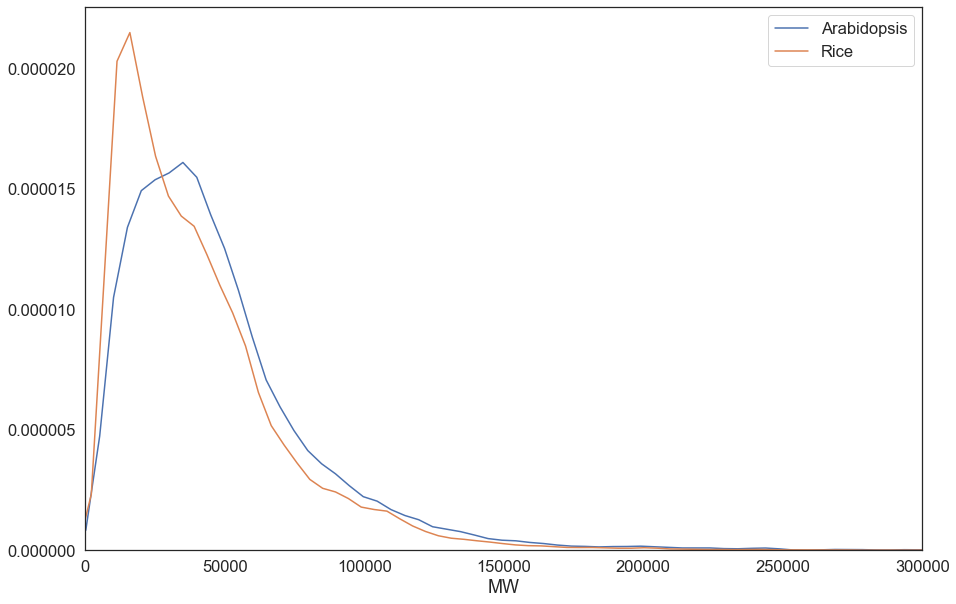

In [24]:
from matplotlib import pyplot as plt
#x와 y의 인치로 지정
plt.figure(figsize=(15,10))
sns.set(font_scale=1.5)
sns.set_style("white")

g=sns.distplot(DNAprotein['MW'],hist=False,label='Arabidopsis')
g=sns.distplot(RiceDNAprotein['MW'],hist=False,label='Rice')
#X축의 범위를 지정 
g.set(xlim=(0,300000))

In [59]:
1. 하나의 생물에서 서로 다른 계열의 단백질 (예 : Protein Kinase와 Protein Phosphatase 등등) 의 분자량 분포는 어떻게 다를까? 
2. 다른 식물 혹은 동물에서의 단백질 분자량을 추정해 보자. 

SyntaxError: invalid syntax (<ipython-input-59-f8177a4b9e51>, line 1)